In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
BASE_DIR = f""

In [ ]:
# Run different strategies using CORDS: https://github.com/decile-team/cords
df = pd.read_csv(f"{BASE_DIR}/dss_compare.csv")
df.head()

,dataset,model,selection_strategy,acc_1p,acc_5p,acc_10p,acc_30p,time_1p,time_5p,time_10p,time_30p,acc_1p_stdev,acc_5p_stdev,acc_10p_stdev,acc_30p_stdev
0,CIFAR10,ResNet18,Full,95.19,95.19,95.19,95.19,1.727369,1.727369,1.727369,1.727369,0.430,0.430,0.4300,0.4300
1,CIFAR10,ResNet18,Rand,39.91,63.52,77.47,89.62,0.016460,0.080304,0.172237,0.506287,0.187,0.127,0.1730,0.1540
2,CIFAR10,ResNet18,AdaRand,63.71,88.20,91.09,94.05,0.016322,0.081361,0.177631,0.506837,1.981,0.218,1.8700,0.0837
3,CIFAR10,ResNet18,GLISTER,38.20,79.02,90.67,93.04,0.085390,0.160182,0.230156,0.576149,0.760,1.872,5.8721,0.8630
4,CIFAR10,ResNet18,CRAIG,64.11,84.35,88.97,92.99,0.139407,0.193425,0.265448,0.607561,9.310,4.831,4.3130,0.2841


In [ ]:
# use time in minutes
df.time_1p *= 60
df.time_5p *= 60
df.time_10p *= 60
df.time_30p *= 60

In [ ]:
df_c10_r18 = df[(df['model'] == 'ResNet18') & (df['dataset'] == 'CIFAR10')].copy()
df_c10_r101 = df[(df['model'] == 'ResNet101') & (df['dataset'] == 'CIFAR10')].copy()
df_c100_r18 = df[(df['model'] == 'ResNet18') & (df['dataset'] == 'CIFAR100')].copy()
df_c100_r101 = df[(df['model'] == 'ResNet101') & (df['dataset'] == 'CIFAR100')].copy()
df_ti_r18 = df[(df['model'] == 'ResNet18') & (df['dataset'] == 'TinyImagenet')].copy()
df_ti_r101 = df[(df['model'] == 'ResNet101') & (df['dataset'] == 'TinyImagenet')].copy()

In [ ]:
rcParams_ticks = {'figure.dpi': 200.0, 'xtick.bottom': True, 'ytick.left': False, 'legend.loc': 'lower right', 'legend.fancybox': True,
                  'axes.edgecolor': 'grey', 'axes.xmargin': 0.05, 'text.usetex': False}
sns.set_theme(style='ticks', rc=rcParams_ticks)

In [ ]:
df_ti_r18

,dataset,model,selection_strategy,acc_1p,acc_5p,acc_10p,acc_30p,time_1p,time_5p,time_10p,time_30p,acc_1p_stdev,acc_5p_stdev,acc_10p_stdev,acc_30p_stdev
32,TinyImagenet,ResNet18,Full,52.4400,52.44,52.44,52.44,924.660,924.66,924.66,924.66,0.510,0.510,0.51,0.51
33,TinyImagenet,ResNet18,Rand,3.2100,13.00,19.61,35.68,10.260,52.44,109.20,299.40,0.530,0.872,0.41,0.73
34,TinyImagenet,ResNet18,AdaRand,0.6200,27.34,38.73,50.30,10.080,49.92,109.20,307.20,0.410,0.763,0.31,0.63
35,TinyImagenet,ResNet18,GLISTER,0.9667,25.53,36.41,46.86,82.500,123.66,169.38,358.08,0.125,0.450,0.45,0.17
36,TinyImagenet,ResNet18,CRAIG,1.3100,22.31,34.21,4.31,118.800,153.60,194.46,385.20,2.310,0.470,0.51,0.21
37,TinyImagenet,ResNet18,GradMatch,3.2100,28.41,35.64,50.34,100.800,121.20,160.44,357.24,0.730,0.230,0.46,0.53
38,TinyImagenet,ResNet18,MILO (Fixed),4.5170,13.83,20.03,35.79,10.770,47.40,109.20,293.40,0.320,0.430,0.24,0.53
39,TinyImagenet,ResNet18,MILO,16.3300,31.70,39.99,50.56,10.206,48.60,108.60,298.20,0.530,0.410,0.32,0.41


In [ ]:
fname = 'c10_resnet18_acc'
df_curr = df_c10_r18.copy()
plot_acc = True
include_stdev = False

subset_sizes = [1, 5, 10, 30]

plt_dict_acc = {}
for _, r in df_curr.iterrows():
  plt_dict_acc[r.selection_strategy] = (np.array([r.acc_1p, r.acc_5p, r.acc_10p, r.acc_30p]),
                                    np.array([r.acc_1p_stdev, r.acc_5p_stdev, r.acc_10p_stdev, r.acc_30p_stdev]))

plt_dict_time = {}
for _, r in df_curr.iterrows():
  plt_dict_time[r.selection_strategy] = (np.array([r.time_1p, r.time_5p, r.time_10p, r.time_30p]),
                                    np.array([0, 0, 0, 0]))  # don't have stdev values for time

In [ ]:
if plot_acc:
  plt_dict = plt_dict_acc
else:
  plt_dict = plt_dict_time

In [ ]:
if 'notfull' in fname:
  plt_dict.pop('Full')

In [ ]:
y_lims = None # (0, 100)
fig_size = (5,5)
fontsize_labels = 16
fontsize_ticks = 12
marker_size = 4
marker_width = 2

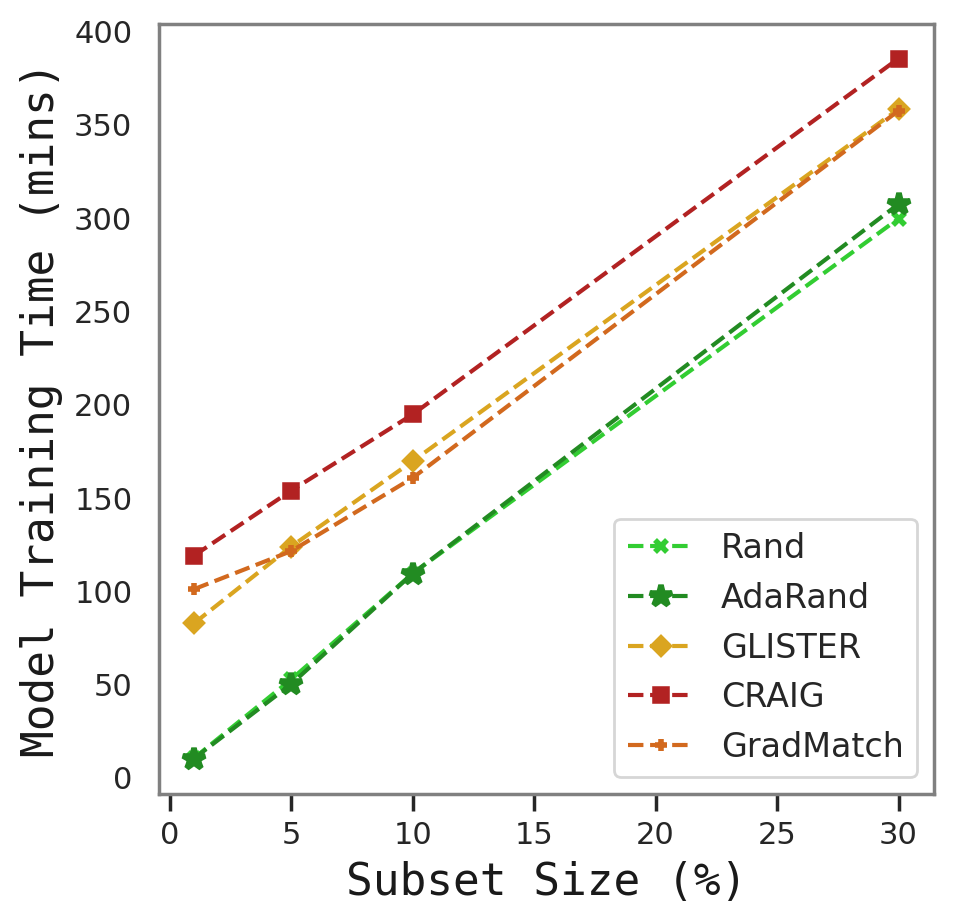

In [ ]:
color_list = ['slategray', 'limegreen', 'forestgreen', 'goldenrod', 'firebrick', 'chocolate', 'goldenrod','deepskyblue','orchid','slategray','teal','mediumvioletred','indianred','sienna','limegreen','olive']
tick_markers = ['-', 'x--', '*--', 'D--','s--', '+--']
plt.figure(figsize=fig_size)  # reduce first element to bring points closer on x-axis
plt.xlabel('Subset Size (%)', fontdict={'family':'monospace', 'color':'k', 'size':fontsize_labels})
if plot_acc:
  plt.ylabel('Top-1 Accuracy (%)', fontdict={'family':'monospace', 'color':'k', 'size':fontsize_labels})
else:
  plt.ylabel('Model Training Time (mins)', fontdict={'family':'monospace', 'color':'k', 'size':fontsize_labels})

if y_lims != None:
    plt.ylim(y_lims)
    plt.tick_params(axis="y", labelsize=fontsize_ticks)
    # plt.yticks([])  # to hide ylabels

for i, (method, (val, std)) in enumerate(plt_dict.items()):
  if method=='AdaRand':
    plt.plot(subset_sizes, val, tick_markers[i], color=color_list[i], markersize=marker_size+4, markeredgewidth=marker_width)
  else:
    plt.plot(subset_sizes, val, tick_markers[i], color=color_list[i], markersize=marker_size, markeredgewidth=marker_width)
  if include_stdev:
    plt.fill_between(subset_sizes, val-std, val+std, color=color_list[i], alpha=0.5)

if not include_stdev:  # legends messed up with stdev
  plt.legend(plt_dict.keys(), fontsize=fontsize_ticks)

plt.savefig(f'{BASE_DIR}/{fname}.pdf', bbox_inches='tight')